In [1]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
import time

def img_integrala(img, method=1):
    L, C = np.shape(img)
    img_out = np.zeros((L, C))
    if method == 1:
        img_out = np.cumsum(np.cumsum(img, axis=0), axis=1)
    elif method == 2:
        img_out[0, 0] = img[0, 0]
        for j in range(1, C):
            img_out[0, j] = img[0, j] + img_out[0, j-1]
        for i in range(1, L):
            img_out[i, 0] = img[i, 0] + img_out[i-1, 0]
        for i in range(1, L):
            for j in range(1, C):
                img_out[i, j] = img[i, j] + img_out[i, j-1] + img_out[i-1, j] - img_out[i-1, j-1]
    return img_out

In [2]:
#matrici de TEST
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[3,2,1,1],[1,2,3,4]])

#calculez dimensiunea pt a,b
h_a,w_a = np.shape(a)
h_b,w_b = np.shape(b)

img_integ_a_V1 = img_integrala(a, method=1)
img_integ_a_V2 = img_integrala(a, method=2)

img_integ_b_V1 = img_integrala(b, method=1)
img_integ_b_V2 = img_integrala(b, method=2)

# ar treb sa dea (T,T)
print(img_integ_a_V1==img_integ_a_V2,img_integ_b_V1==img_integ_b_V2)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]] [[ True  True  True  True]
 [ True  True  True  True]]


In [3]:
img = io.imread('noise_img1.jpg')
img_gray = color.rgb2gray(img)
[L, C] = np.shape(img_gray)

In [4]:
start1=time.time()
img_integ_img_V1=img_integrala(img_gray, method=1)
end1=time.time()
elapsed1=(end1-start1)

start2=time.time()
img_integ_img_V1=img_integrala(img_gray, method=2)
end2=time.time()
elapsed2=(end2-start2)

print(elapsed1/(elapsed2 + 0.00001))

0.0


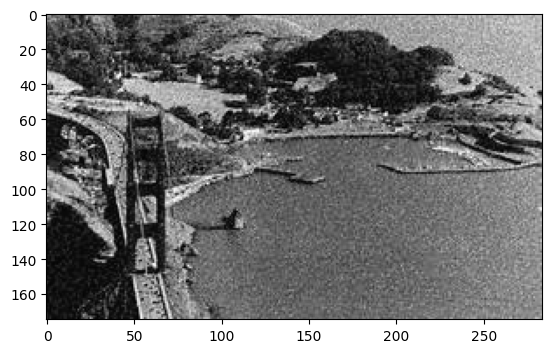

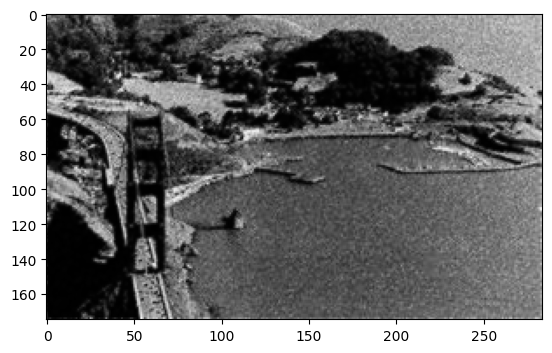

In [ ]:
def suma_dreptunghi(x, y, h, w, integral_img):
    A = integral_img[x-1, y-1] if x > 0 and y > 0 else 0
    B = integral_img[x-1, y+w-1] if x > 0 else 0
    C = integral_img[x+h-1, y-1] if y > 0 else 0
    D = integral_img[x+h-1, y+w-1]
    return D - B - C + A

def filt_LEE(capat, size, h, w, noise_var, img_integ, img_integ_sq, img_denoise):
    for i in range(capat, h - capat):
        for j in range(capat, w - capat):
            img_mean = suma_dreptunghi(i - capat, j - capat, size, size, img_integ) / (size * size)
            img_mean_sq = img_mean ** 2
            img_sq_mean = suma_dreptunghi(i - capat, j - capat, size, size, img_integ_sq) / (size * size)
            fer_var = img_sq_mean - img_mean_sq
            fer_var = max(fer_var, noise_var)
            alpha = np.sqrt(noise_var / fer_var)
            img_denoise[i, j] = alpha * img_mean + (1 - alpha) * img_denoise[i, j]
    return img_denoise

# Aplicare filtru Lee
img_Lee = io.imread('noise_img1.jpg')
img_Lee = color.rgb2gray(img_Lee)
plt.figure(),plt.imshow(img_Lee,cmap='gray')
h,w = img_Lee.shape

noise_var = img_gray[:10, :10].var()
img_denoise = img_Lee.copy()
img_integ_sq = img_integrala(img_gray**2, method=1)
size = 3
capat = size // 2
img_denoise = filt_LEE(capat, size, L, C, noise_var, img_integ_sq, img_integ_sq, img_denoise)

plt.figure(), plt.imshow(img_denoise, cmap='gray')
plt.show()
